In [96]:
import pandas as pd
import numpy as np
df = pd.read_csv("study_time_data.csv")
df.head()

,subject,deadline,difficulty,previous_score,time
0,Maths,1,Hard,35,21
1,Maths,11,Hard,69,13
2,CS,2,Easy,29,7
3,Chemistry,8,Hard,35,24
4,History,5,Easy,27,10


In [97]:
df.describe()

,deadline,previous_score,time
count,1000.000000,1000.000000,1000.000000
mean,7.366000,51.187000,11.480000
std,3.989732,28.485917,5.650091
min,1.000000,0.000000,1.000000
25%,4.000000,26.750000,7.000000
50%,7.000000,52.000000,11.000000
75%,11.000000,76.000000,16.000000
max,14.000000,100.000000,25.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject         1000 non-null   object
 1   deadline        1000 non-null   int64 
 2   difficulty      1000 non-null   object
 3   previous_score  1000 non-null   int64 
 4   time            1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


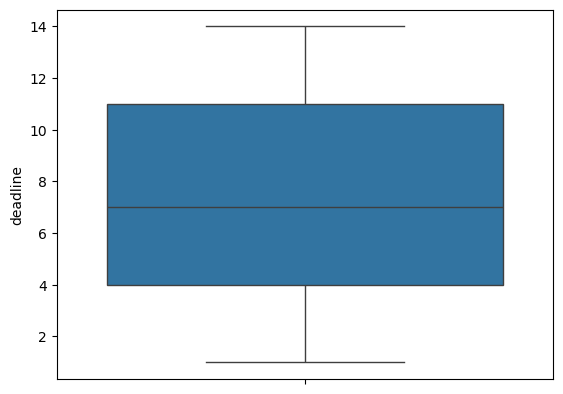

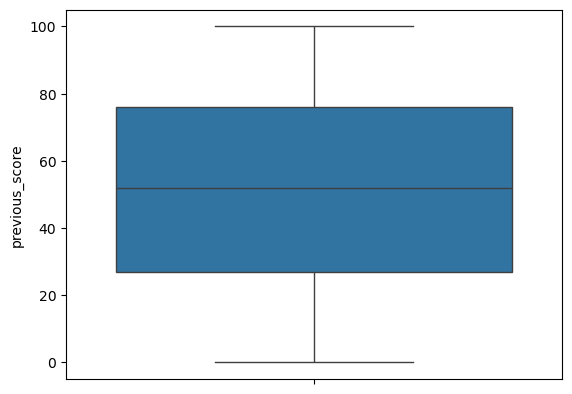

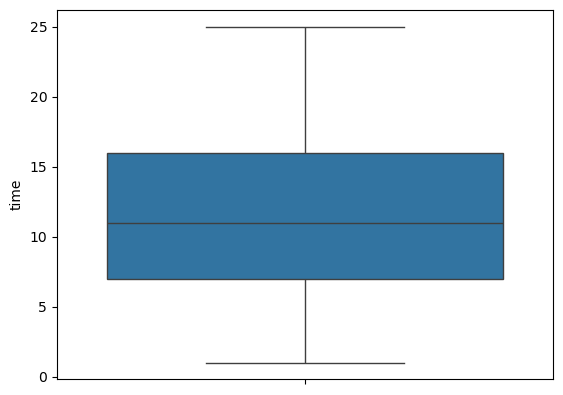

In [99]:
# outlier detection

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["deadline", "previous_score", "time"]

for i in num_cols:
    plt.figure()
    sns.boxplot(df[i])

In [100]:
# outlier removal
q25, q75 = np.percentile(df['time'], [25, 75])
q25, q75

(7.0, 16.0)

In [101]:
iqr = q75 - q25
iqr

9.0

In [102]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.5*iqr
q0, q100

(-6.5, 29.5)

In [103]:
from scipy.stats import iqr
iqr = iqr(df['time'])
iqr

9.0

In [104]:
df = df[(df['time'] >= q0) & (df['time'] <= q100)]

In [105]:
df

,subject,deadline,difficulty,previous_score,time
0,Maths,1,Hard,35,21
1,Maths,11,Hard,69,13
2,CS,2,Easy,29,7
3,Chemistry,8,Hard,35,24
4,History,5,Easy,27,10
...,...,...,...,...,...
995,Physics,3,Easy,14,7
996,English,5,Medium,23,12
997,History,3,Medium,57,13
998,CS,7,Medium,98,5


In [106]:
# encode difficulty levels
levels = {
    "Easy": 1,
    "Medium": 2,
    "Hard": 3
}

df['difficulty'] = df['difficulty'].map(levels)
df.head()

,subject,deadline,difficulty,previous_score,time
0,Maths,1,3,35,21
1,Maths,11,3,69,13
2,CS,2,1,29,7
3,Chemistry,8,3,35,24
4,History,5,1,27,10


<Axes: >

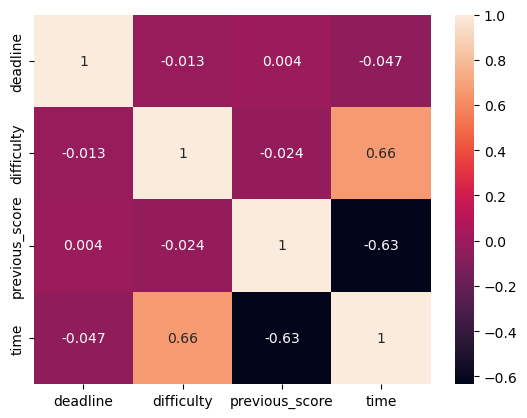

In [107]:
sns.heatmap(df.drop('subject', axis=1).corr(), annot=True)

In [108]:
# scale features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_x = StandardScaler()

df[['deadline', 'previous_score']] = scaler_x.fit_transform(df[['deadline', 'previous_score']])
df

,subject,deadline,difficulty,previous_score,time
0,Maths,-1.596394,3,-0.568530,21
1,Maths,0.911294,3,0.625639,13
2,CS,-1.345625,1,-0.779266,7
3,Chemistry,0.158987,3,-0.568530,24
4,History,-0.593319,1,-0.849511,10
...,...,...,...,...,...
995,Physics,-1.094857,1,-1.306105,7
996,English,-0.593319,2,-0.990002,12
997,History,-1.094857,2,0.204168,13
998,CS,-0.091781,2,1.644196,5


In [109]:
X = df.drop(['time', 'subject'], axis=1)
y = df['time']
X, y

(     deadline  difficulty  previous_score
 0   -1.596394           3       -0.568530
 1    0.911294           3        0.625639
 2   -1.345625           1       -0.779266
 3    0.158987           3       -0.568530
 4   -0.593319           1       -0.849511
 ..        ...         ...             ...
 995 -1.094857           1       -1.306105
 996 -0.593319           2       -0.990002
 997 -1.094857           2        0.204168
 998 -0.091781           2        1.644196
 999 -1.596394           3        0.625639
 
 [1000 rows x 3 columns],
 0      21
 1      13
 2       7
 3      24
 4      10
        ..
 995     7
 996    12
 997    13
 998     5
 999    19
 Name: time, Length: 1000, dtype: int64)

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler()

y = y.values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y)

In [111]:
X

,deadline,difficulty,previous_score
0,-1.596394,3,-0.568530
1,0.911294,3,0.625639
2,-1.345625,1,-0.779266
3,0.158987,3,-0.568530
4,-0.593319,1,-0.849511
...,...,...,...
995,-1.094857,1,-1.306105
996,-0.593319,2,-0.990002
997,-1.094857,2,0.204168
998,-0.091781,2,1.644196


In [112]:
y_scaled

array([[0.83333333],
       [0.5       ],
       [0.25      ],
       [0.95833333],
       [0.375     ],
       [0.375     ],
       [0.16666667],
       [0.83333333],
       [0.375     ],
       [0.79166667],
       [0.625     ],
       [0.33333333],
       [0.70833333],
       [0.66666667],
       [0.45833333],
       [1.        ],
       [0.33333333],
       [0.70833333],
       [0.08333333],
       [0.625     ],
       [0.70833333],
       [0.54166667],
       [0.54166667],
       [0.375     ],
       [0.45833333],
       [0.375     ],
       [0.04166667],
       [0.625     ],
       [0.08333333],
       [0.45833333],
       [0.95833333],
       [0.29166667],
       [0.45833333],
       [0.70833333],
       [0.41666667],
       [0.66666667],
       [0.20833333],
       [0.08333333],
       [0.33333333],
       [0.75      ],
       [0.875     ],
       [0.20833333],
       [0.45833333],
       [0.25      ],
       [0.66666667],
       [0.20833333],
       [0.58333333],
       [0.083

In [124]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=21)

In [125]:
X_train.shape

(700, 3)

In [126]:
y_train.shape

(700, 1)

In [127]:
# model building using deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

In [264]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Users\tarus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [265]:
model.save_weights("saved_model/weights.weights.h5")

In [274]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [282]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mae: 0.0658 - val_loss: 0.0092 - val_mae: 0.0748
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mae: 0.0650 - val_loss: 0.0087 - val_mae: 0.0728
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mae: 0.0672 - val_loss: 0.0090 - val_mae: 0.0740
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - mae: 0.0623 - val_loss: 0.0078 - val_mae: 0.0699
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - mae: 0.0629 - val_loss: 0.0078 - val_mae: 0.0704
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - mae: 0.0610 - val_loss: 0.0077 - val_mae: 0.0698
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mae: 0.0642 - val_loss: 0.0076 - val_mae: 0.0690
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mae: 0.0639 - val_loss: 0.0080 - val_mae: 0.0705
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mae: 

In [283]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [284]:
y_pred[:5], y_test[:5]

(array([[0.36881527],
        [0.14264217],
        [0.06647971],
        [0.28312203],
        [0.2228052 ]], dtype=float32),
 array([[0.41666667],
        [0.125     ],
        [0.08333333],
        [0.5       ],
        [0.20833333]]))

In [285]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - mae: 0.0691


[0.007824121043086052, 0.06989149749279022]

In [286]:
# inverse transform of time values 
y_pred_inverse = scaler_y.inverse_transform(y_pred).astype(int)
y_pred_inverse

array([[ 9],
       [ 4],
       [ 2],
       [ 7],
       [ 6],
       [ 5],
       [13],
       [10],
       [10],
       [10],
       [13],
       [ 7],
       [10],
       [14],
       [ 8],
       [ 3],
       [14],
       [15],
       [13],
       [10],
       [ 8],
       [10],
       [ 6],
       [ 5],
       [ 6],
       [ 7],
       [ 6],
       [11],
       [ 6],
       [15],
       [11],
       [ 6],
       [10],
       [ 6],
       [14],
       [17],
       [ 3],
       [10],
       [18],
       [12],
       [18],
       [ 5],
       [ 2],
       [10],
       [14],
       [ 4],
       [ 7],
       [ 8],
       [ 4],
       [10],
       [10],
       [19],
       [18],
       [18],
       [18],
       [ 7],
       [18],
       [17],
       [ 7],
       [10],
       [10],
       [18],
       [19],
       [14],
       [ 7],
       [ 8],
       [ 4],
       [14],
       [ 7],
       [ 4],
       [14],
       [10],
       [14],
       [ 8],
       [18],
       [ 3],
       [10],

In [287]:
y_test_inverse = scaler_y.inverse_transform(y_test)
y_test_inverse

array([[11.],
       [ 4.],
       [ 3.],
       [13.],
       [ 6.],
       [ 9.],
       [16.],
       [10.],
       [10.],
       [12.],
       [15.],
       [ 9.],
       [12.],
       [16.],
       [ 7.],
       [ 2.],
       [18.],
       [16.],
       [12.],
       [13.],
       [ 5.],
       [12.],
       [ 8.],
       [ 7.],
       [ 6.],
       [ 7.],
       [ 6.],
       [12.],
       [ 9.],
       [15.],
       [ 9.],
       [ 6.],
       [10.],
       [ 9.],
       [18.],
       [22.],
       [ 6.],
       [ 9.],
       [18.],
       [12.],
       [18.],
       [ 7.],
       [ 2.],
       [10.],
       [18.],
       [ 3.],
       [ 8.],
       [10.],
       [ 3.],
       [ 6.],
       [10.],
       [18.],
       [20.],
       [24.],
       [22.],
       [ 7.],
       [20.],
       [22.],
       [ 6.],
       [10.],
       [ 8.],
       [18.],
       [22.],
       [15.],
       [ 8.],
       [ 6.],
       [ 5.],
       [15.],
       [ 8.],
       [ 5.],
       [17.],
      

In [288]:
# evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  0.06989150062203407
Mean Squared Error:  0.007824121537962681
R2 Score:  0.8465566010041912


In [290]:
import joblib

joblib.dump(scaler_x, "saved_model/scaler_x.pkl")
joblib.dump(scaler_y, "saved_model/scaler_y.pkl")

['saved_model/scaler_y.pkl']

In [291]:
model.save("saved_model/model.h5") 
model.save("saved_model/model.keras") 

In [154]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=21)

In [155]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [159]:
y_pred = xgb.predict(X_test)
y_pred_inverse = np.rint(scaler_y.inverse_transform(y_pred.reshape(-1,1)))
y_pred_inverse

array([[ 9.],
       [ 5.],
       [ 3.],
       [ 9.],
       [ 6.],
       [ 5.],
       [13.],
       [11.],
       [11.],
       [10.],
       [14.],
       [ 8.],
       [11.],
       [17.],
       [10.],
       [ 3.],
       [18.],
       [18.],
       [17.],
       [10.],
       [ 7.],
       [10.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 5.],
       [11.],
       [ 7.],
       [18.],
       [10.],
       [ 6.],
       [10.],
       [ 7.],
       [16.],
       [19.],
       [ 4.],
       [12.],
       [24.],
       [13.],
       [18.],
       [ 6.],
       [ 3.],
       [10.],
       [12.],
       [ 4.],
       [ 7.],
       [ 9.],
       [ 5.],
       [11.],
       [11.],
       [20.],
       [19.],
       [19.],
       [22.],
       [ 8.],
       [24.],
       [22.],
       [ 8.],
       [10.],
       [11.],
       [20.],
       [22.],
       [17.],
       [ 8.],
       [ 8.],
       [ 4.],
       [16.],
       [ 7.],
       [ 3.],
       [18.],
      

In [160]:
y_test_inverse 

array([[11.],
       [ 4.],
       [ 3.],
       [13.],
       [ 6.],
       [ 9.],
       [16.],
       [10.],
       [10.],
       [12.],
       [15.],
       [ 9.],
       [12.],
       [16.],
       [ 7.],
       [ 2.],
       [18.],
       [16.],
       [12.],
       [13.],
       [ 5.],
       [12.],
       [ 8.],
       [ 7.],
       [ 6.],
       [ 7.],
       [ 6.],
       [12.],
       [ 9.],
       [15.],
       [ 9.],
       [ 6.],
       [10.],
       [ 9.],
       [18.],
       [22.],
       [ 6.],
       [ 9.],
       [18.],
       [12.],
       [18.],
       [ 7.],
       [ 2.],
       [10.],
       [18.],
       [ 3.],
       [ 8.],
       [10.],
       [ 3.],
       [ 6.],
       [10.],
       [18.],
       [20.],
       [24.],
       [22.],
       [ 7.],
       [20.],
       [22.],
       [ 6.],
       [10.],
       [ 8.],
       [18.],
       [22.],
       [15.],
       [ 8.],
       [ 6.],
       [ 5.],
       [15.],
       [ 8.],
       [ 5.],
       [17.],
      

In [161]:
# evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  0.07265215805835194
Mean Squared Error:  0.008509525655492851
R2 Score:  0.8331147421361683


In [162]:
import joblib

joblib.dump(xgb, "saved_model/xgb.pkl")

['saved_model/xgb.pkl']